In [1]:
import pandas as pd
import matplotlib.pyplot as plt

programs = ['alpha', 'beta', 'gamma', 'delta']
algorithms = ['fifo', 'rand', 'custom']
dependent_vars = ['page_faults', 'disk_reads', 'disk_writes']
column_names = ['program', 'algo', 'npages', 'nframes', 'page_faults', 'disk_reads', 'disk_writes']

algo_styles = {'fifo': {'marker': '*', 'linestyle': '-'},
               'rand': {'marker': 'x', 'linestyle': '--'},
               'custom': {'marker': '.', 'linestyle': '-.'}}

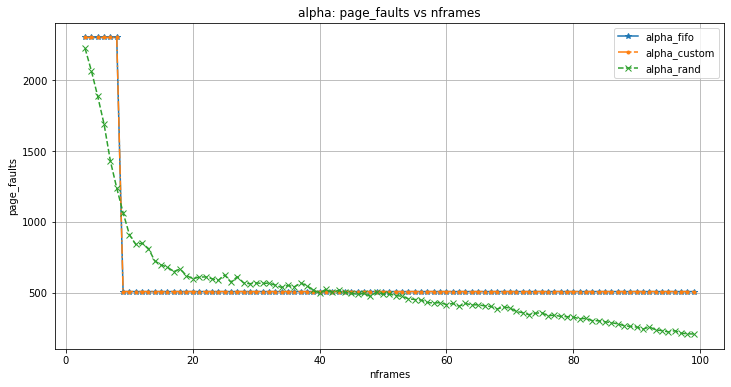

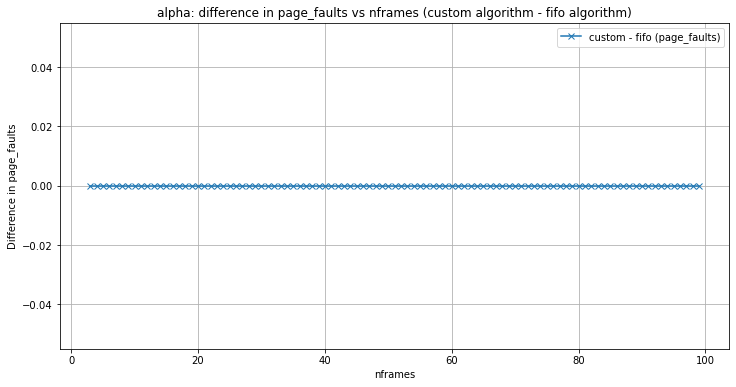

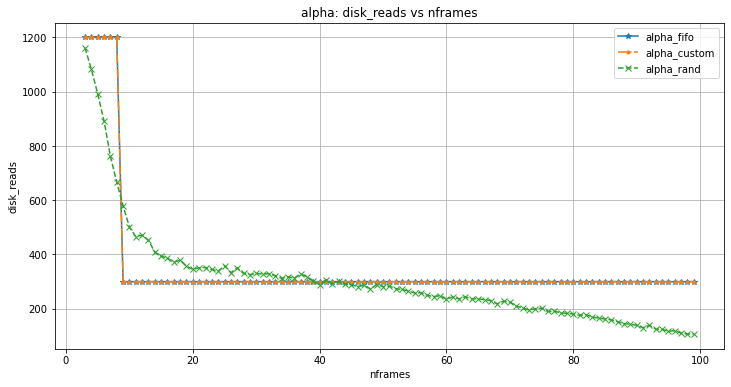

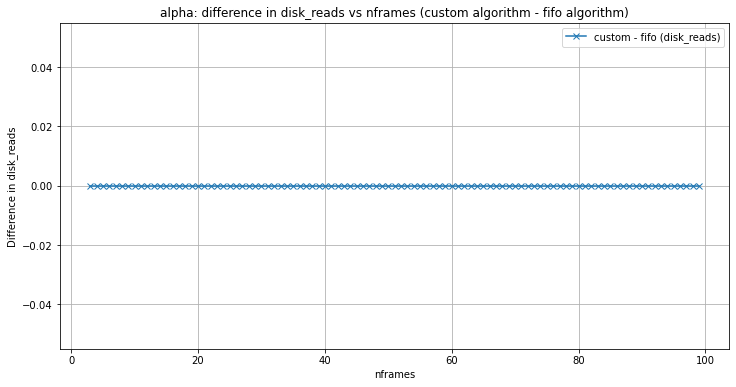

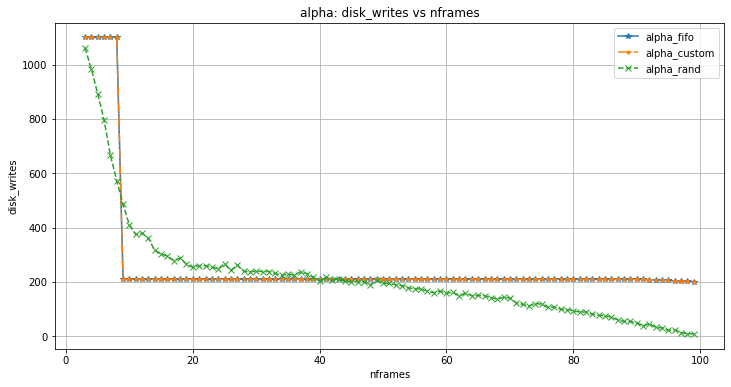

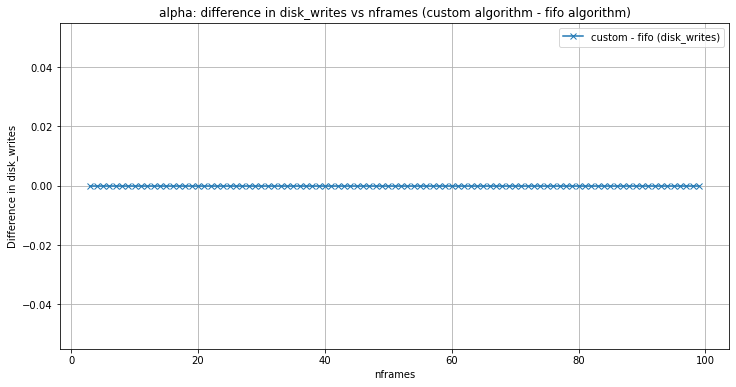

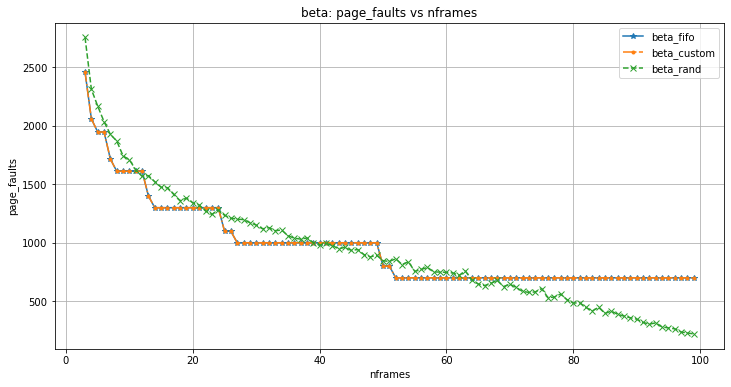

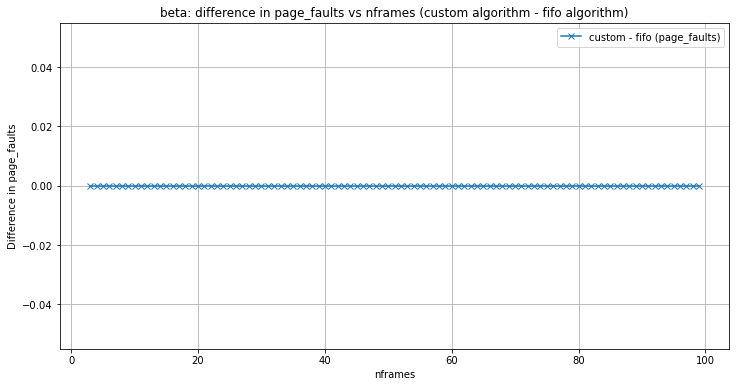

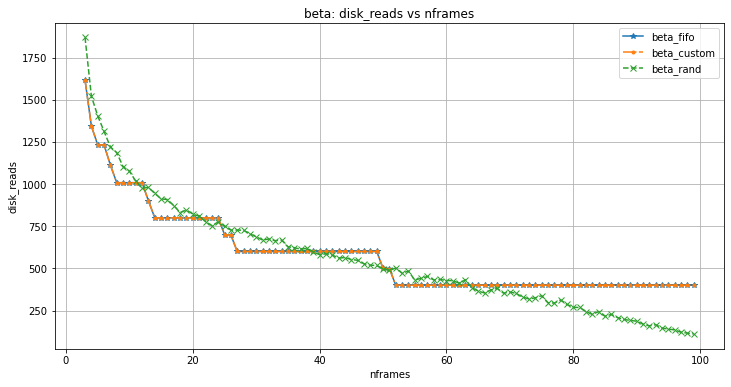

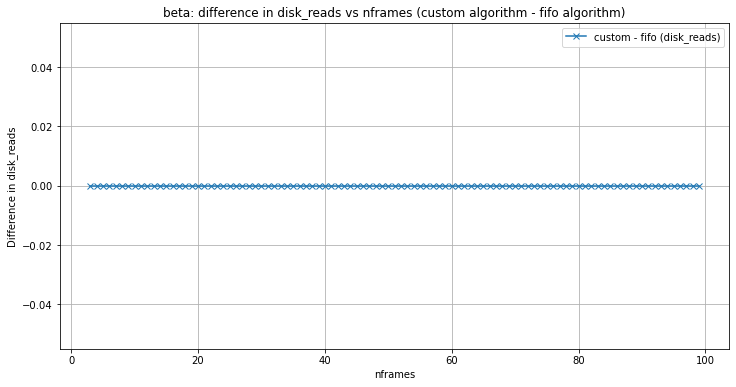

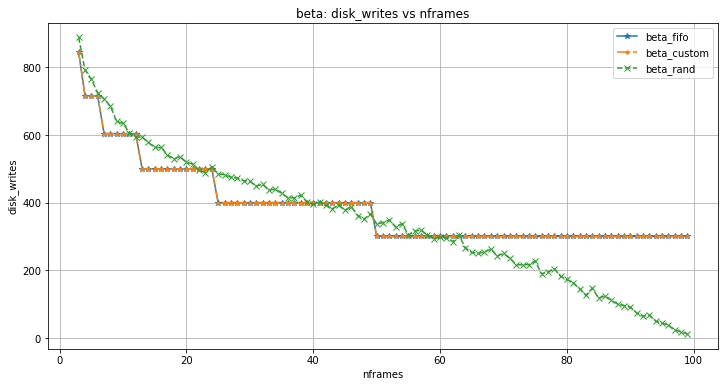

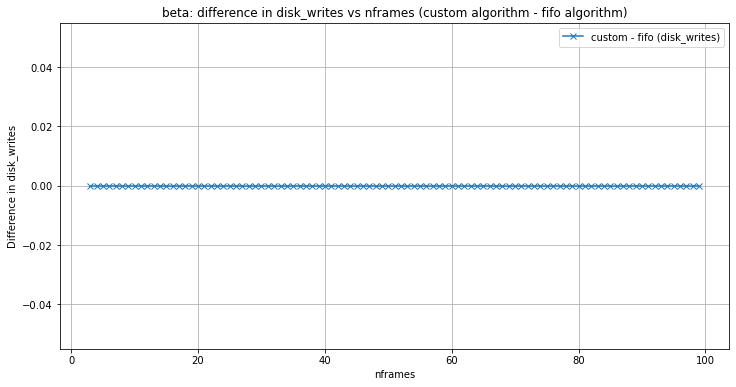

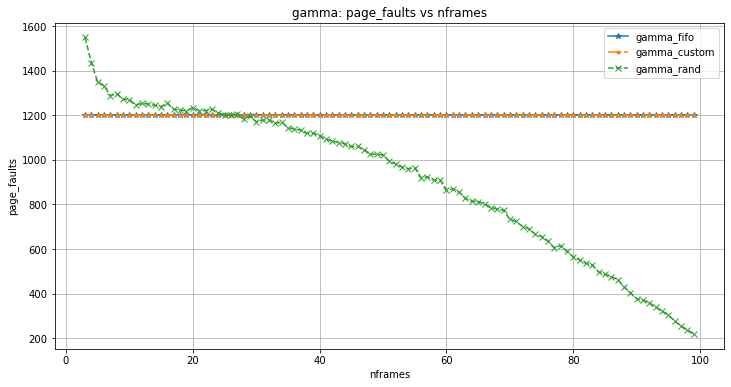

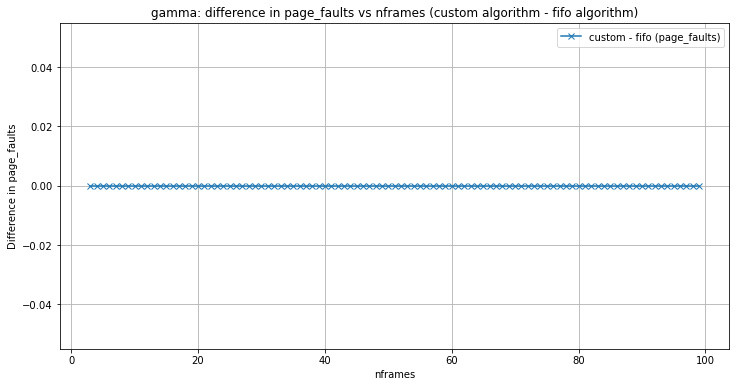

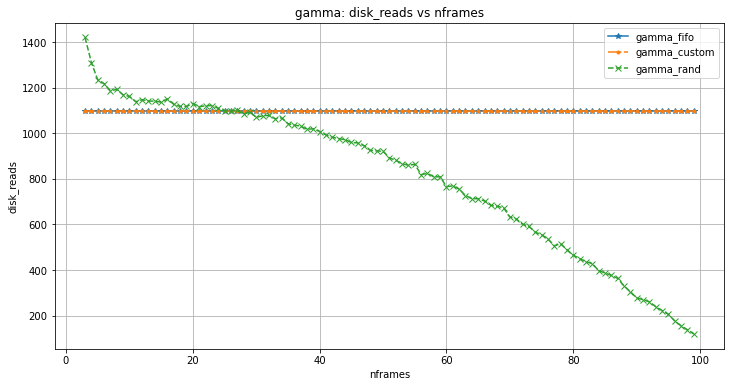

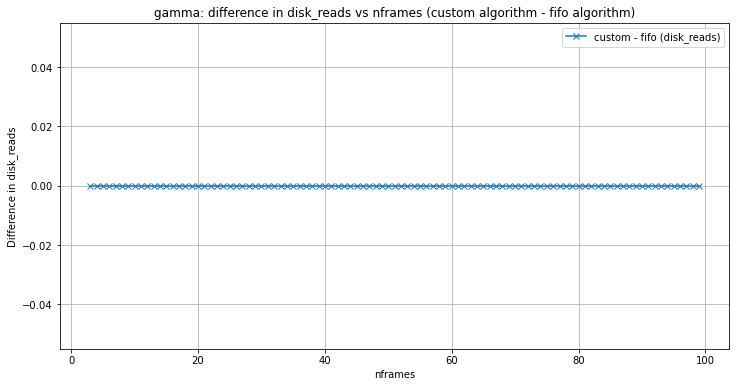

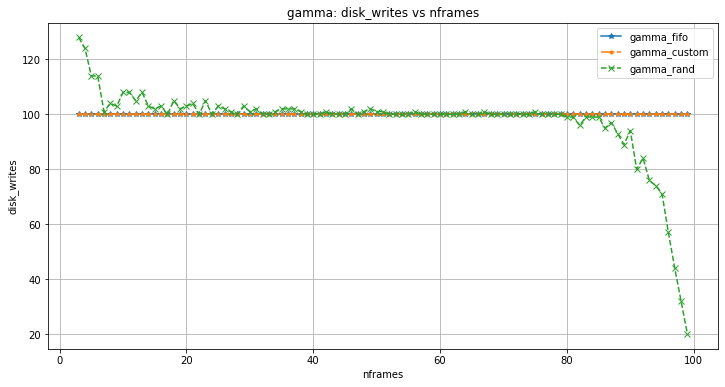

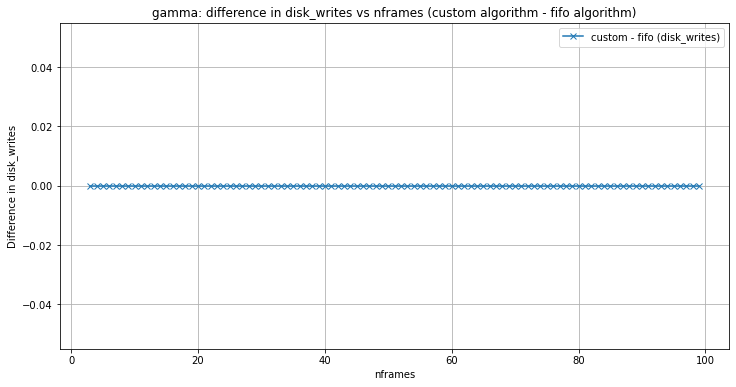

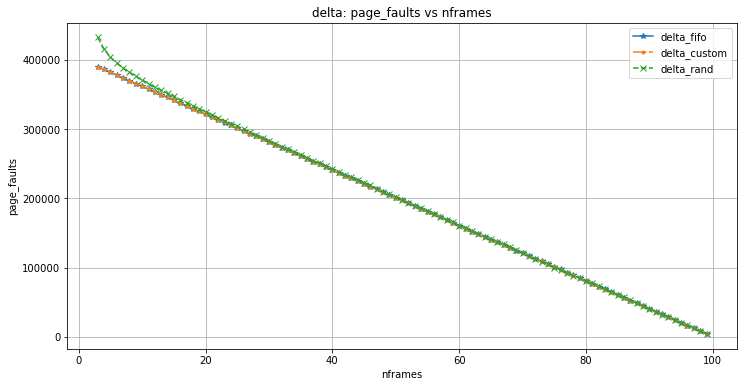

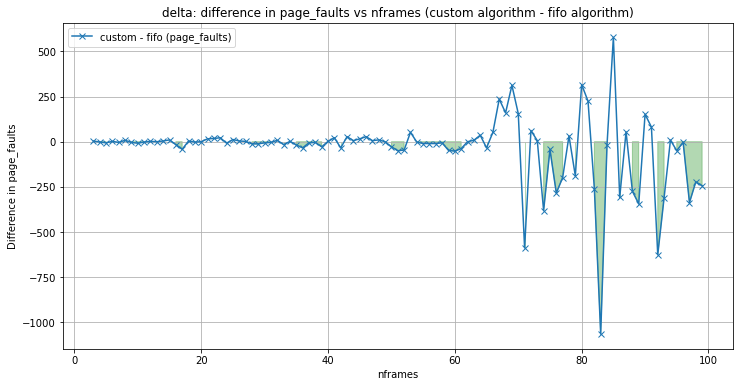

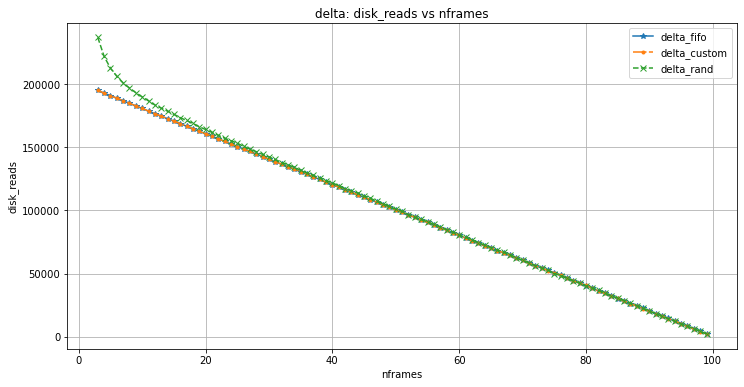

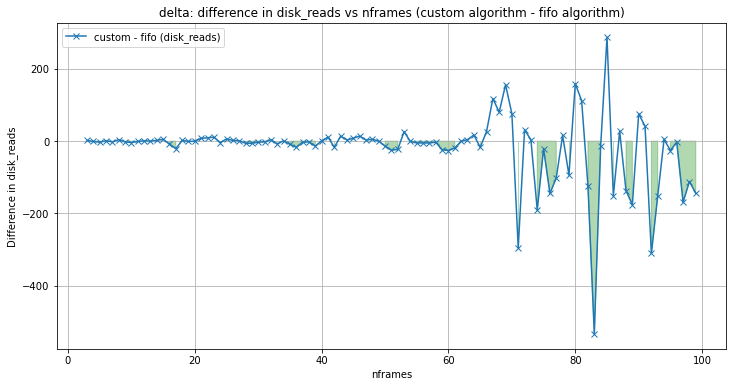

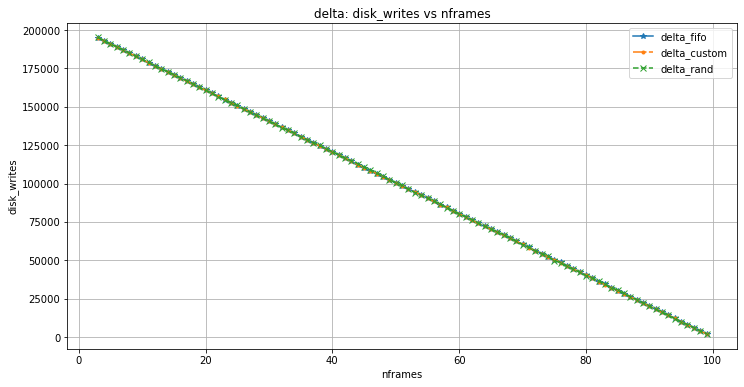

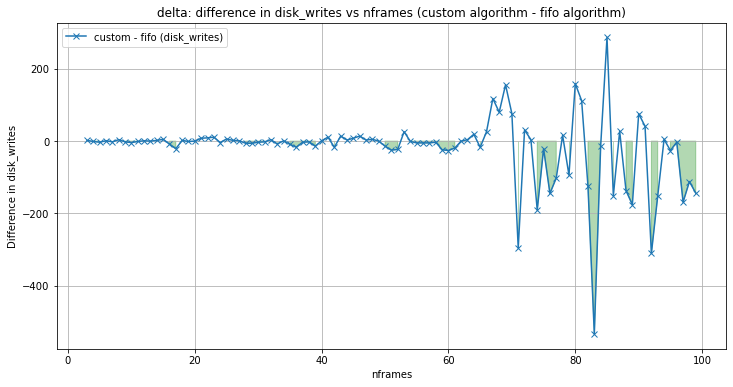

In [3]:
dataframes = []
for program in programs:
    for algo in algorithms:
        file_name = f"{program}_{algo}.csv"
        df = pd.read_csv(file_name, header=None, names=column_names)
        dataframes.append(df)

all_data = pd.concat(dataframes)
grouped_data = all_data.groupby(['program', 'algo'])

for program in programs:
    program_data = all_data[all_data['program'] == program]
    for var in dependent_vars:
        plt.figure(figsize=(12, 6))  
        for algo in ['fifo', 'custom', 'rand']: 
            for group_name, group_data in grouped_data:
                if group_name[0] == program and group_name[1] == algo:
                    style = algo_styles[group_name[1]]
                    plt.plot(group_data['nframes'], group_data[var], label=f"{group_name[0]}_{group_name[1]}", marker=style['marker'], linestyle=style['linestyle'])

            
        plt.xlabel('nframes')
        plt.ylabel(var)
        plt.title(f'{program}: {var} vs nframes')
        plt.legend()
        plt.grid(True)  
        plt.show()

        
        plt.figure(figsize=(12, 6))
        fifo_data = program_data[program_data['algo'] == 'fifo']
        custom_data = program_data[program_data['algo'] == 'custom']
        diff = custom_data[var].values - fifo_data[var].values
        plt.plot(fifo_data['nframes'], diff, label=f"custom - fifo ({var})", marker='x', linestyle='-')
        plt.xlabel('nframes')
        plt.ylabel(f'Difference in {var}')
        plt.title(f'{program}: difference in {var} vs nframes (custom algorithm - fifo algorithm)')
        plt.legend()
        plt.grid(True)
        plt.fill_between(fifo_data['nframes'], diff, 0, where=(diff < 0), color='green', alpha=0.3, label='custom better')
        plt.show()
            
